In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st


In [2]:
customer = pd.read_csv("C:/Users/Admin/Desktop/Project2/data/Customers.csv",encoding='ISO-8859-1')
customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [3]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [5]:
customer["Birthday"]=pd.to_datetime(customer["Birthday"],errors='coerce').dt.date
customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [6]:
customer["Birthday"]=pd.to_datetime(customer["Birthday"],format='%y-%m-%d').dt.date
customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [7]:
customer.dropna(inplace=True)
customer.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [8]:
customer.drop("State Code",axis=1,inplace=True)
customer.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
dtype: int64

In [9]:
customer

,CustomerKey,Gender,Name,City,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,California,92501,United States,North America,1937-10-12


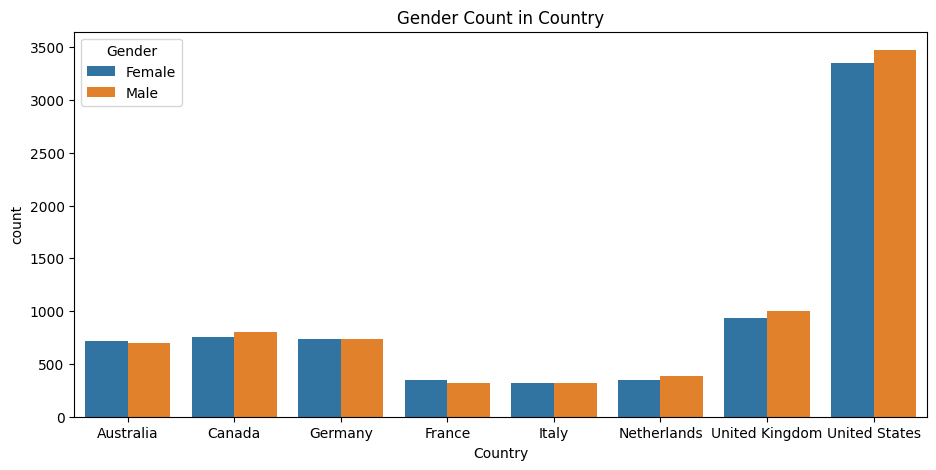

In [10]:
male = customer[customer["Gender"] == "Male"]['Country']
female = customer[customer["Gender"] == "Female"]['Country']

plt.figure(figsize=(11,5))
sns.countplot(x='Country', data=customer, hue='Gender')
plt.title("Gender Count in Country")
plt.show()

In [11]:
Exchange_rate = pd.read_csv("C:/Users/Admin/Desktop/Project2/data/Exchange_Rates.csv")
Exchange_rate

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [12]:
Exchange_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [13]:
Exchange_rate.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [14]:
Exchange_rate["Date"]=pd.to_datetime(Exchange_rate["Date"],errors='coerce').dt.date
Exchange_rate

,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [15]:
products = pd.read_csv("C:/Users/Admin/Desktop/Project2/data/Products.csv")
products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [16]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [17]:
products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [18]:
products["Unit Cost USD"]=products["Unit Cost USD"].str.strip("$")
products["Unit Cost USD"]=products["Unit Cost USD"].str.replace(',',"")

In [19]:
products["Unit Cost USD"] = products["Unit Cost USD"].astype('float')

In [20]:
products["Unit Price USD"] = products["Unit Price USD"].str.strip("$")
products["Unit Price USD"] = products["Unit Price USD"].str.replace(',',"")
products["Unit Price USD"] = products["Unit Price USD"].astype(float)
products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [21]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


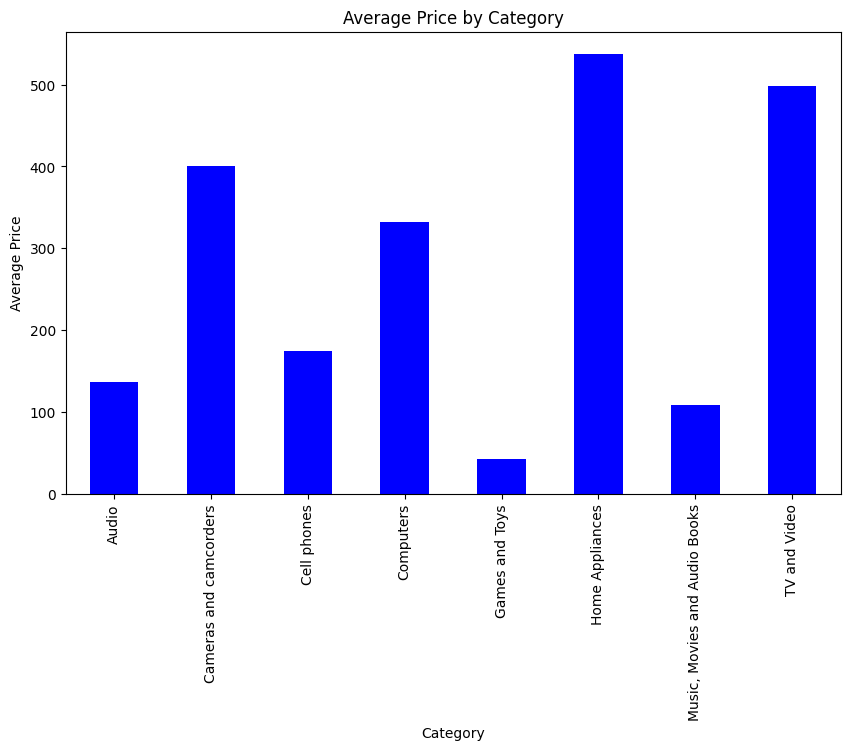

In [22]:
category_avg_price = products.groupby('Category')['Unit Price USD'].mean()
plt.figure(figsize=(10,6))
category_avg_price.plot(kind='bar', color='blue')

plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.show()

In [23]:
sales = pd.read_csv("C:/Users/Admin/Desktop/Project2/data/Sales.csv")
sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [24]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [25]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [26]:
sales["Order Date"]=pd.to_datetime(sales["Order Date"],errors='coerce').dt.date
sales["Delivery Date"]=pd.to_datetime(sales["Delivery Date"],errors='coerce').dt.date
sales["Delivery Date"] = sales["Delivery Date"].fillna(0)
sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,0,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,0,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [27]:
sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

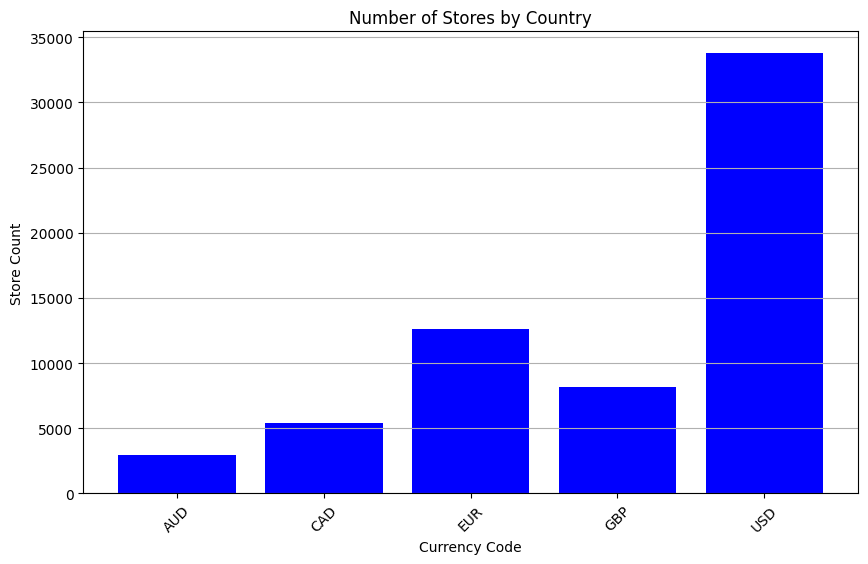

In [28]:
# Group by 'Country' and count the number of stores
country_group = sales.groupby('Currency Code').size().reset_index(name='Store_Count')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(country_group['Currency Code'], country_group['Store_Count'], color='blue')

# Adding titles and labels
plt.title('Number of Stores by Country')
plt.xlabel('Currency Code')
plt.ylabel('Store Count')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()




In [29]:
stores = pd.read_csv("C:/Users/Admin/Desktop/Project2/data/Stores.csv")
stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [30]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [31]:
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [32]:
stores["Open Date"] = pd.to_datetime (stores["Open Date"],errors='coerce').dt.date
stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [33]:
stores["Square Meters"]=stores["Square Meters"].fillna(0)
stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


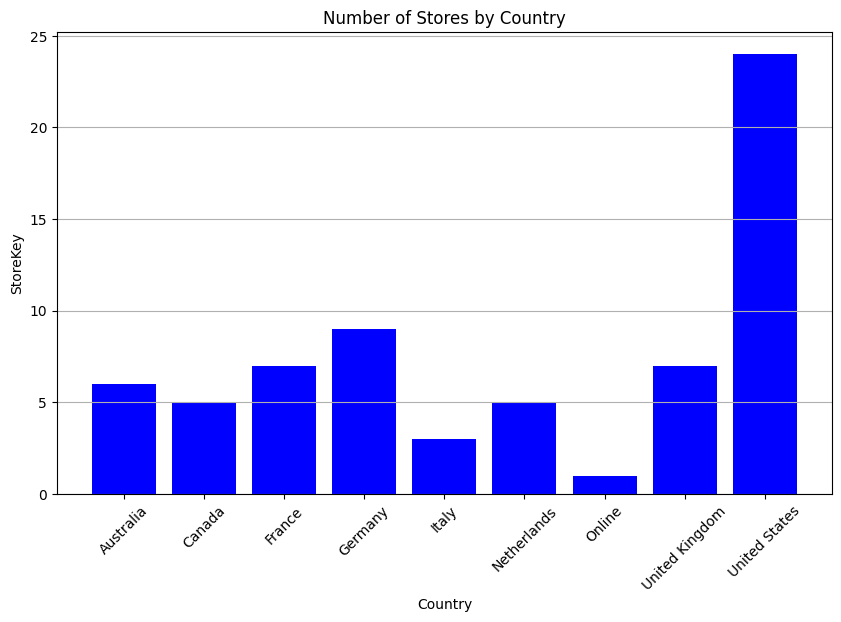

In [34]:
# Group by 'Country' and count the number of stores
country_group = stores.groupby('Country').size().reset_index(name='StoreKey')

# Plotting the data
plt.figure(figsize=(10, 6))
plt.bar(country_group['Country'], country_group['StoreKey'], color='blue')

# Adding titles and labels
plt.title('Number of Stores by Country')
plt.xlabel('Country')
plt.ylabel('StoreKey')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.show()




In [35]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
mydb = mysql.connector.connect(
 host="localhost",
 user="root",
 password="Saran!24",


)


print(mydb)
mycursor = mydb.cursor(buffered=True)

In [47]:
mycursor.execute("create database Project2")

In [48]:
mycursor.execute("use Project2")
mycursor.execute("""create table Customer (Customer_Key varchar(255),
                 Gender varchar(255),Name varchar(255),City varchar(255),State varchar(255),	
                 Zip_Code varchar(255),Country varchar(255),Continent varchar(255),Birthday varchar(255))""")

In [49]:
data = customer.values.tolist()  

mycursor.execute("use Project2")
query = """INSERT INTO Customer (Customer_key, Gender, Name, City, State, Zip_code, Country, Continent, Birthday) 
           VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"""

for row in data:
    mycursor.execute(query, row)
mydb.commit()


In [50]:
mycursor.execute("use Project2")
mycursor.execute("create table Exchange_rate (Date varchar(255),Currency varchar(255),Exchange varchar(255))")

In [51]:
data = Exchange_rate.values.tolist()  

mycursor.execute("use Project2")
query = """INSERT INTO Exchange_rate (Date,Currency,Exchange)
           VALUES (%s, %s, %s)"""

for row in data:
    mycursor.execute(query, row)
mydb.commit()


In [ ]:
mycursor.execute("use Project2")
mycursor.execute("""create table products (Product_Key int,Product_Name varchar(255),
                 Brand varchar(255),Color varchar(255),Unit_Cost_USD float,
                 Unit_Price_USD float,Subcategory_Key int,
                 Subcategory varchar(255),Category_Key int,Category varchar(255))""")

In [54]:
data = products.values.tolist()  

mycursor.execute("use Project2")
query = """INSERT INTO products (
           Product_Key,Product_Name,
           Brand,Color,Unit_Cost_USD,
           Unit_Price_USD,Subcategory_Key,
           Subcategory,Category_Key,Category)
            VALUES (%s, %s, %s,%s, %s, %s,%s, %s, %s,%s)"""

for row in data:   
       mycursor.execute(query, row)
mydb.commit()

In [55]:
mycursor.execute("use Project2")
mycursor.execute("""create table sales (Order_Number int,Line_Item int,
                 Order_Date varchar(255),Delivery_Date varchar(255),Customer_Key int,
                 Store_Key int,Product_Key int,Quantity int,Currency_Code varchar(255))""")

In [56]:
data = sales.values.tolist()  

mycursor.execute("use Project2")
query="""INSERT INTO sales (Order_Number,Line_Item,
         Order_Date,Delivery_Date,Customer_Key,Store_Key,Product_Key,Quantity,Currency_Code)
         VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"""
for row in data:
    mycursor.execute(query, row) 
mydb.commit()


In [57]:
mycursor.execute("use Project2")
mycursor.execute("create table stores (Store_Key int,Country varchar(255),State varchar(255),Square_Meters float,Open_Date varchar(255))")

In [58]:
data = stores.values.tolist()  

mycursor.execute("use Project2")
query = """INSERT INTO stores (Store_Key, Country, State, Square_Meters, Open_Date) 
           VALUES (%s, %s, %s, %s, %s)"""

for row in data:
    mycursor.execute(query, row)
mydb.commit()
